# Relevant Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from search import expand
from evaluation_functions import path_cost, misplaced_tile_h, manhattan_distance_h
from operators import instantiate_8puzzle
from data_structures import queue
from timeit import default_timer

In [7]:
def bfs_analysis(problem, f):
    # Best First Search with number of notes expanded
                                           
    node = problem['Initial State']
    frontier = queue()
    frontier.append(node, [f, problem])
    reached = {}
    reached[str(node.STATE)] = node

    # Analysis
    expanded = 0                               

    while not frontier.empty():
        node = frontier.pop()
        if problem['Goal State'] == node: return expanded

        expanded +=  1

        for child in expand(problem, node):
            s_lookup = str(child.STATE)
            if (s_lookup not in reached) or (child.PATH_COST < reached[s_lookup].PATH_COST):
                reached[s_lookup] = child
                frontier.append(child, [f, problem])
    return 'failure'

def timed_function(func, problem, f): 
    # Timing function for search process
                                          
    start = default_timer()
    expanded = func(problem, f)
    end = default_timer()

    return [(end - start), expanded]

# Test Cases

In [8]:
# Test Cases

matrices = []

matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
matrices.append(matrix)
matrix = [[1, 2, 3], [4, 5, 6], [0, 7, 8]]
matrices.append(matrix)
matrix = [[1, 2, 3], [5, 0, 6], [4, 7, 8]]
matrices.append(matrix)
matrix = [[1, 3, 6], [5, 0, 2], [4, 7, 8]]
matrices.append(matrix)
matrix = [[1, 3, 6], [5, 0, 7], [4, 8, 2]]
matrices.append(matrix)
matrix = [[1, 6, 7], [5, 0, 3], [4, 8, 2]]
matrices.append(matrix)
matrix = [[7, 1, 2], [4, 8, 5], [6, 3, 0]]
matrices.append(matrix)
matrix = [[0, 7, 2], [4, 6, 1], [3, 5, 8]]
matrices.append(matrix)

In [9]:
expansions = []
evaluations = [path_cost, misplaced_tile_h, manhattan_distance_h]
goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

In [ ]:
# Record search times and nodes expanded for all matrices abov

avg_times = np.zeros((3, 8))
for itr in range(20):
    times = []

    for i, func in enumerate(evaluations):
        time = []
        if itr == 0:
            expands = []

        for j, difficulty in enumerate(matrices):
            problem = instantiate_8puzzle(difficulty, goal_state)
            x, expanded = timed_function(bfs_analysis, problem, func)

            time.append(x)
            if itr == 0:
                expands.append(expanded)

        times.append(time)
        if itr == 0:
            expansions.append(expands)

    times = np.array(times)
    avg_times += times

avg_times = avg_times / (itr + 1)

In [ ]:
# Load number of nodes expanded for hardest test case (depth of 24)

expansions = np.loadtxt('expansions.out', dtype = int)
expansions

In [ ]:
# Load times for hardest test case (depth of 24)

avg_times = np.loadtxt('avg_times.out')
avg_times

In [12]:
exp_arr = np.array(expansions)

ucs_avg_times = avg_times[0]
ucs_expansions = exp_arr[0]

misplaced_avg_times = avg_times[1]
misplaced_expansions = exp_arr[1]

manhattan_avg_times = avg_times[2]
manhattan_expansions = exp_arr[2]

# Timestamps and Nodes Expanded Curves

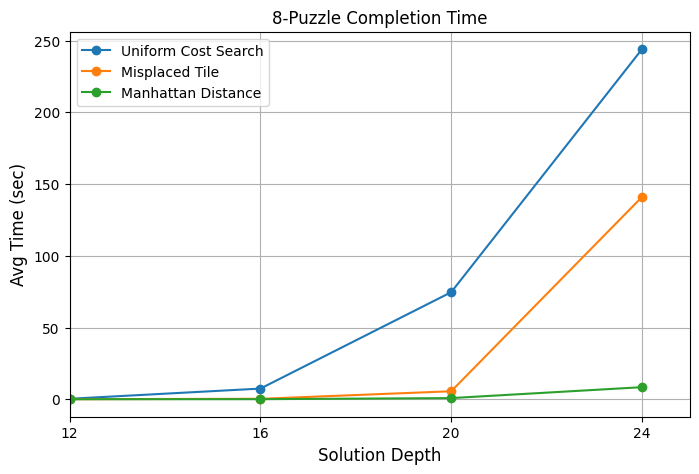

In [32]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot([0, 2, 4, 8, 12, 16, 20, 24], ucs_avg_times, marker = 'o')
ax.plot([0, 2, 4, 8, 12, 16, 20, 24], misplaced_avg_times, marker = 'o')
ax.plot([0, 2, 4, 8, 12, 16, 20, 24], manhattan_avg_times, marker = 'o')

plt.xticks(np.arange(0, 25, 4))
plt.xlabel('Solution Depth', fontsize = 12)
plt.ylabel('Avg Time (sec)', fontsize = 12)
plt.xlim(12, 25)
plt.title('8-Puzzle Completion Time')
plt.grid()
ax.legend(['Uniform Cost Search', 'Misplaced Tile', 'Manhattan Distance'])

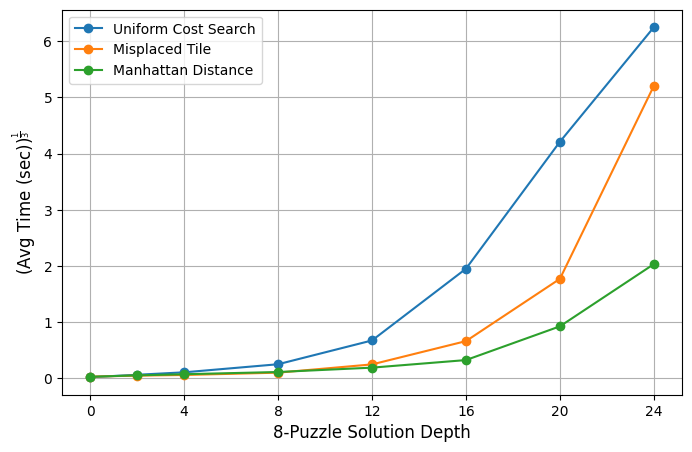

In [34]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.plot([0, 2, 4, 8, 12, 16, 20, 24], np.power(ucs_avg_times, (1 / 3)), marker = 'o')
ax.plot([0, 2, 4, 8, 12, 16, 20, 24], np.power(misplaced_avg_times, (1 / 3)), marker = 'o')
ax.plot([0, 2, 4, 8, 12, 16, 20, 24], np.power(manhattan_avg_times, (1 / 3)), marker = 'o')

plt.xticks(np.arange(0, 25, 4))
plt.xlabel('8-Puzzle Solution Depth', fontsize = 12)
plt.ylabel(r'(Avg Time (sec))$^{\frac{1}{3}}$', fontsize = 12)
plt.grid()
ax.legend(['Uniform Cost Search', 'Misplaced Tile', 'Manhattan Distance'])

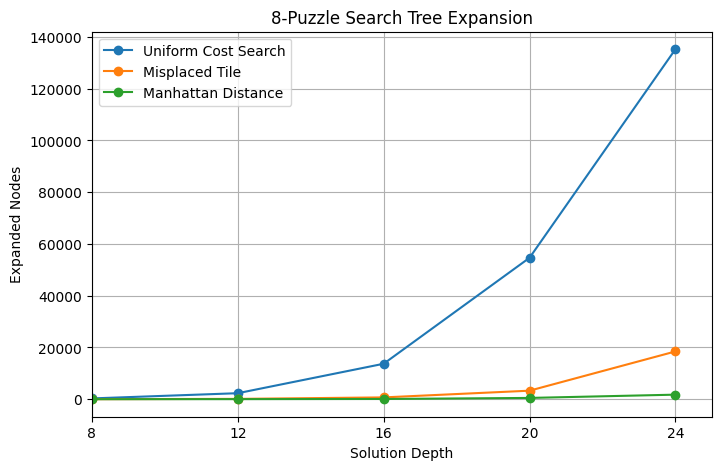

In [33]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot([0, 2, 4, 8, 12, 16, 20, 24], ucs_expansions, marker = 'o')
ax.plot([0, 2, 4, 8, 12, 16, 20, 24], misplaced_expansions, marker = 'o')
ax.plot([0, 2, 4, 8, 12, 16, 20, 24], manhattan_expansions, marker = 'o')

plt.xticks(np.arange(0, 25, 4))
plt.xlabel('Solution Depth')
plt.ylabel('Expanded Nodes')
plt.xlim(8, 25)
plt.title('8-Puzzle Search Tree Expansion')
plt.grid()
ax.legend(['Uniform Cost Search', 'Misplaced Tile', 'Manhattan Distance'])

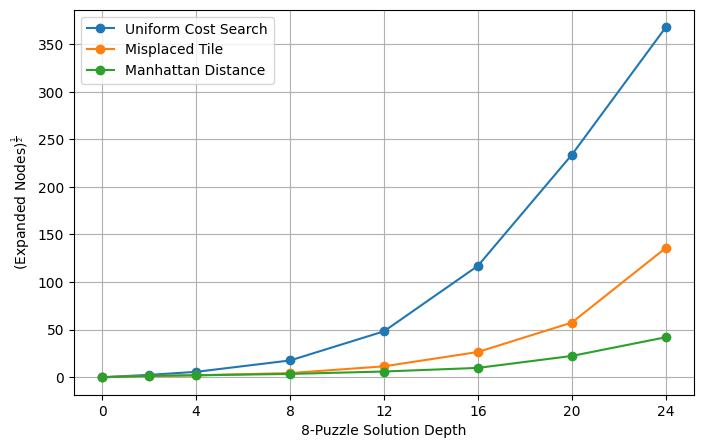

In [35]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot([0, 2, 4, 8, 12, 16, 20, 24], np.power(ucs_expansions, (1 / 2)), marker = 'o')
ax.plot([0, 2, 4, 8, 12, 16, 20, 24], np.power(misplaced_expansions, (1 / 2)), marker = 'o')
ax.plot([0, 2, 4, 8, 12, 16, 20, 24], np.power(manhattan_expansions, (1 / 2)), marker = 'o')

plt.xticks(np.arange(0, 25, 4))
plt.xlabel('8-Puzzle Solution Depth')
plt.ylabel(r'(Expanded Nodes)$^{\frac{1}{2}}$')
plt.grid()
ax.legend(['Uniform Cost Search', 'Misplaced Tile', 'Manhattan Distance'])

In [17]:
max_time = max(ucs_avg_times)
min_time = max(manhattan_avg_times)

max_expansions = max(ucs_expansions)
min_expansions = max(manhattan_expansions)